# **1. Linear Regression**



### * Aim: To predict the price of house given a set of independent numerical features.
### Objective:
### 1. To analyse the influence of outliers on the data
### 2. To check for Overfitting of the model.
### 3. If the model is overfitting, implement Lasso and Ridge
### * Dataset:  Melbourne Housing Dataset
### * Source: Kaggle

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the dataset
data =pd.read_csv("Melbourne_housing_FULL.csv")
data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
# Dimensions of dataset
data.shape

(29067, 21)

In [ ]:
# Descriptions of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29067 entries, 0 to 29066
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         29067 non-null  object 
 1   Address        29067 non-null  object 
 2   Rooms          29067 non-null  int64  
 3   Type           29067 non-null  object 
 4   Price          22737 non-null  float64
 5   Method         29067 non-null  object 
 6   SellerG        29067 non-null  object 
 7   Date           29067 non-null  object 
 8   Distance       29067 non-null  float64
 9   Postcode       29067 non-null  int64  
 10  Bedroom2       22555 non-null  float64
 11  Bathroom       22549 non-null  float64
 12  Car            22251 non-null  float64
 13  Landsize       19579 non-null  float64
 14  BuildingArea   11772 non-null  float64
 15  YearBuilt      13423 non-null  float64
 16  CouncilArea    29065 non-null  object 
 17  Lattitude      22766 non-null  float64
 18  Longti

In [ ]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,29067.000000,2.273700e+04,29067.000000,29067.000000,22555.000000,22549.000000,22251.000000,19579.000000,11772.000000,13423.000000,22766.000000,22766.000000,29065.000000
mean,3.012798,1.057331e+06,10.817064,3113.484088,3.028065,1.600603,1.680868,580.510751,157.374571,1964.908143,-37.812155,145.001892,7533.403681
std,0.976029,6.469642e+05,6.494827,102.411715,0.997052,0.721297,0.994566,3596.853781,428.473771,37.421840,0.085613,0.113983,4421.815225
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,83.000000
25%,2.000000,6.380000e+05,6.300000,3051.000000,2.000000,1.000000,1.000000,200.000000,99.000000,1940.000000,-37.861322,144.937400,4380.000000
50%,3.000000,8.800000e+05,10.100000,3103.000000,3.000000,1.000000,2.000000,485.000000,132.000000,1970.000000,-37.808920,145.006650,6567.000000
75%,4.000000,1.300000e+06,13.800000,3153.000000,4.000000,2.000000,2.000000,665.000000,184.000000,2000.000000,-37.757500,145.068600,10331.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.395100,145.526350,21650.000000


In [ ]:
# Dropping the categorical columns
data.drop(["Suburb","Address","Type","Method","SellerG","Date","Postcode","CouncilArea","Regionname"], axis =1, inplace=True)

In [ ]:
data.shape

(29067, 12)

* The dataset consists of 34857 records and 21 features. We shall consider only the numerical columns for our prediction and thereby drop all the Categorical Columns. Thus,

* Independent Variables: 'Rooms', "Distance","Bedroom2","Bathroom" "Car","Landsize","BuildingArea","YearBuilt","Lattitude","Longtitude","Propertycount"

* Dependent Variables: "Price"

Data Preprocessing

In [ ]:
# Count of null values in all columns
data.isna().sum()

Rooms                0
Price             6330
Distance             0
Bedroom2          6512
Bathroom          6518
Car               6816
Landsize          9488
BuildingArea     17295
YearBuilt        15644
Lattitude         6301
Longtitude        6301
Propertycount        2
dtype: int64

In [ ]:
# Percentage of missing values in all columns
data.isna().sum()/len(data)*100

Rooms             0.000000
Price            21.777273
Distance          0.000000
Bedroom2         22.403413
Bathroom         22.424055
Car              23.449272
Landsize         32.641828
BuildingArea     59.500464
YearBuilt        53.820484
Lattitude        21.677504
Longtitude       21.677504
Propertycount     0.006881
dtype: float64

In [ ]:
# Replacing the null values with mean
data["Price"] =  data["Price"].fillna(data["Price"].mean())
data["Landsize"] =  data["Landsize"].fillna(data["Landsize"].mean())
data["BuildingArea"] =  data["BuildingArea"].fillna(data["BuildingArea"].mean())

In [ ]:
# Replacing the null values with mode
data["Bedroom2"].fillna(data["Bedroom2"].mode()[0], inplace =True)
data["Bathroom"].fillna(data["Bathroom"].mode()[0], inplace =True)
data["Car"].fillna(data["Car"].mode()[0], inplace =True)
data["YearBuilt"].fillna(data["YearBuilt"].mode()[0], inplace=True)



In [ ]:
# Dropping rows which have very few missing values
data.dropna(subset = ["Distance"], inplace=True, axis=0)
data.dropna(subset =["Propertycount"], inplace=True, axis = 0)
data.dropna(subset=["Lattitude"], inplace=True, axis=0)
data.dropna(subset=["Longtitude"], inplace=True, axis=0)

In [ ]:
#Count of null values after removing the null values
data.isna().sum()

Rooms            0
Price            0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [ ]:
# Dimensions of the dataset after removing the null values
data.shape

(22766, 12)

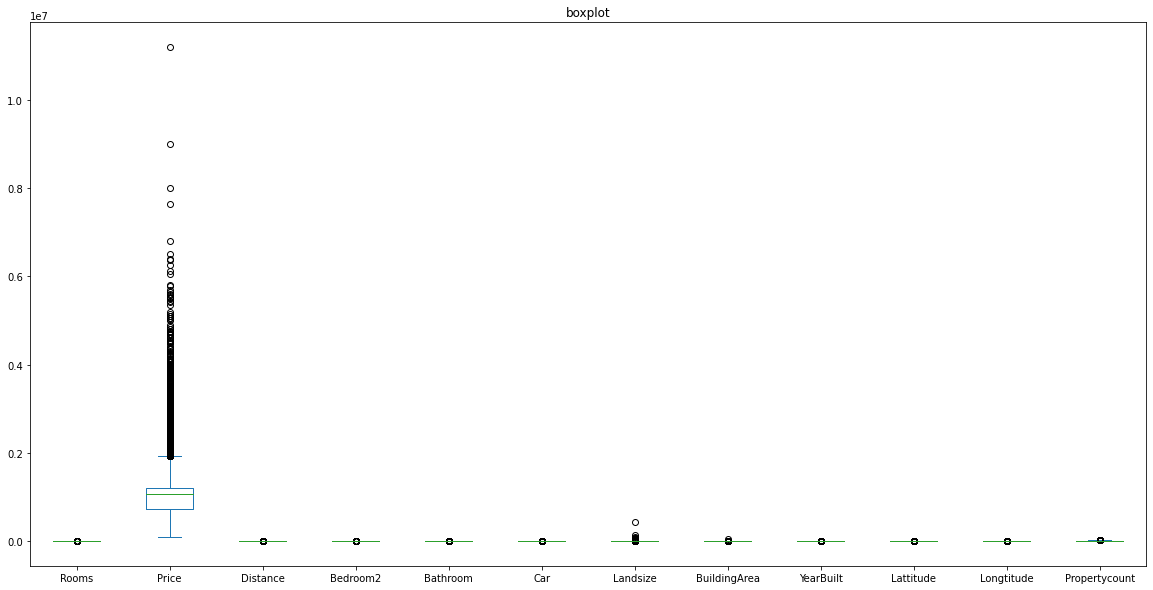

In [ ]:
# Box plots to detect the outliers
data[['Rooms', 'Price', "Distance","Bedroom2","Bathroom", "Car","Landsize","BuildingArea","YearBuilt","Lattitude","Longtitude","Propertycount"]].plot(kind='box', title='boxplot',figsize=(20,10))
plt.show()

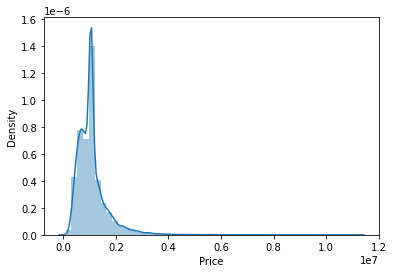

In [ ]:
sns.distplot(data["Price"])

In [ ]:
# Removal of outliers
print("Highest allowed",data['Price'].mean() + 3*data['Price'].std())
print("Lowest allowed",data['Price'].mean() - 3*data['Price'].std())

Highest allowed 2807369.780189975
Lowest allowed -652093.6187492197


In [ ]:
data[(data['Price'] >2813047.1587214326 ) | (data['Price'] < -650890.8320894134)]

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
135,3,2850000.0,3.3,3.0,2.0,0.0,211.000000,198.000000,1890.0,-37.8481,144.9499,3280.0
166,3,3010000.0,3.3,3.0,2.0,0.0,147.000000,146.000000,1890.0,-37.8473,144.9551,3280.0
178,4,4735000.0,3.3,4.0,2.0,1.0,330.000000,207.000000,1910.0,-37.8477,144.9558,3280.0
182,3,3755000.0,3.3,3.0,2.0,2.0,325.000000,157.374571,1970.0,-37.8413,144.9500,3280.0
202,5,2840000.0,6.4,5.0,4.0,4.0,809.000000,165.000000,1910.0,-37.7750,145.0268,2211.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28844,4,3350000.0,8.4,4.0,2.0,3.0,836.000000,303.000000,1910.0,-37.8732,145.0496,8801.0
28894,3,3680000.0,10.2,3.0,1.0,2.0,1316.000000,157.374571,1950.0,-37.8119,145.1093,2079.0
28976,4,3700000.0,1.8,4.0,3.0,1.0,580.510751,157.374571,1970.0,-37.7958,144.9557,2309.0
28998,3,2925000.0,4.6,3.0,1.0,1.0,346.000000,157.374571,1970.0,-37.8487,144.9863,7717.0


In [ ]:
new_data = data[(data['Price'] < 2813047.1587214326) & (data['Price'] > -650890.8320894134)]
new_data

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1.057331e+06,2.5,2.0,1.0,1.0,126.000000,157.374571,1970.0,-37.8014,144.9958,4019.0
1,2,1.480000e+06,2.5,2.0,1.0,1.0,202.000000,157.374571,1970.0,-37.7996,144.9984,4019.0
2,2,1.035000e+06,2.5,2.0,1.0,0.0,156.000000,79.000000,1900.0,-37.8079,144.9934,4019.0
3,3,1.057331e+06,2.5,3.0,2.0,1.0,0.000000,157.374571,1970.0,-37.8114,145.0116,4019.0
4,3,1.465000e+06,2.5,3.0,2.0,0.0,134.000000,150.000000,1900.0,-37.8093,144.9944,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29061,3,9.700000e+05,5.1,3.0,1.0,2.0,580.510751,157.374571,1970.0,-37.8080,144.8866,2417.0
29062,3,1.057331e+06,1.9,3.0,1.0,2.0,218.000000,132.000000,1905.0,-37.8384,144.9627,5943.0
29063,2,1.150000e+06,1.9,2.0,1.0,2.0,100.000000,84.000000,1890.0,-37.8348,144.9686,5943.0
29065,4,6.300000e+05,20.5,4.0,2.0,2.0,580.510751,155.000000,2008.0,-37.6382,145.0847,7969.0


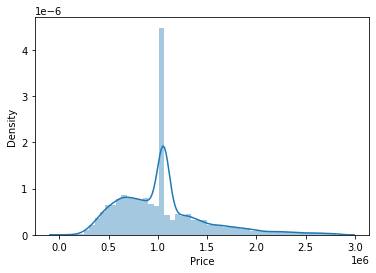

In [ ]:
sns.distplot(new_data["Price"])

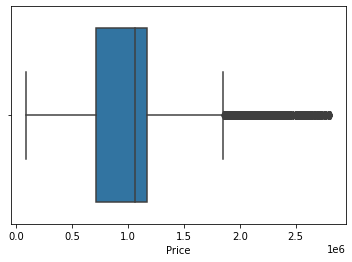

In [ ]:
sns.boxplot(new_data["Price"])

In [ ]:
new_data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,22354.000000,2.235400e+04,22354.000000,22354.000000,22354.000000,22354.000000,22354.000000,22354.000000,22354.000000,22354.000000,22354.000000,22354.000000
mean,3.023799,1.030670e+06,10.837671,3.007426,1.573186,1.674331,577.723176,155.870546,1967.199293,-37.811562,145.001346,7493.527646
std,0.963461,4.477767e+05,6.602853,0.979245,0.695312,0.973940,3365.790544,310.358620,28.579177,0.086094,0.114793,4349.643820
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,83.000000
25%,2.000000,7.150000e+05,6.300000,2.000000,1.000000,1.000000,230.000000,130.000000,1960.000000,-37.861300,144.934957,4385.000000
50%,3.000000,1.057331e+06,9.800000,3.000000,1.000000,2.000000,559.500000,157.374571,1970.000000,-37.807600,145.005815,6567.000000
75%,4.000000,1.170000e+06,13.800000,4.000000,2.000000,2.000000,640.000000,157.374571,1975.000000,-37.756400,145.068800,10331.000000
max,12.000000,2.810000e+06,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.395100,145.526350,21650.000000


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22354 entries, 0 to 29066
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          22354 non-null  int64  
 1   Price          22354 non-null  float64
 2   Distance       22354 non-null  float64
 3   Bedroom2       22354 non-null  float64
 4   Bathroom       22354 non-null  float64
 5   Car            22354 non-null  float64
 6   Landsize       22354 non-null  float64
 7   BuildingArea   22354 non-null  float64
 8   YearBuilt      22354 non-null  float64
 9   Lattitude      22354 non-null  float64
 10  Longtitude     22354 non-null  float64
 11  Propertycount  22354 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 2.2 MB


In [ ]:
# Correlation between the variables.
new_data.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.406826,0.289090,0.929432,0.592815,0.386472,0.031047,0.103343,-0.022628,0.010485,0.103098,-0.070484
Price,0.406826,1.000000,-0.180707,0.383829,0.330584,0.167071,0.034406,0.065181,-0.243121,-0.197558,0.197777,-0.056182
Distance,0.289090,-0.180707,1.000000,0.288358,0.143814,0.252669,0.048401,0.063827,0.225611,-0.129486,0.218430,-0.024782
Bedroom2,0.929432,0.383829,0.288358,1.000000,0.601380,0.384033,0.031060,0.100315,-0.013127,0.008571,0.106036,-0.066778
Bathroom,0.592815,0.330584,0.143814,0.601380,1.000000,0.294755,0.034147,0.096547,0.129203,-0.057712,0.111231,-0.043702
Car,0.386472,0.167071,0.252669,0.384033,0.294755,1.000000,0.033651,0.072141,0.093853,-0.004892,0.053783,-0.016875
Landsize,0.031047,0.034406,0.048401,0.031060,0.034147,0.033651,1.000000,0.087735,0.011247,0.022111,-0.005428,-0.013866
BuildingArea,0.103343,0.065181,0.063827,0.100315,0.096547,0.072141,0.087735,1.000000,0.012408,0.018143,-0.006110,-0.017771
YearBuilt,-0.022628,-0.243121,0.225611,-0.013127,0.129203,0.093853,0.011247,0.012408,1.000000,0.054407,-0.005983,0.015580
Lattitude,0.010485,-0.197558,-0.129486,0.008571,-0.057712,-0.004892,0.022111,0.018143,0.054407,1.000000,-0.357680,0.018934


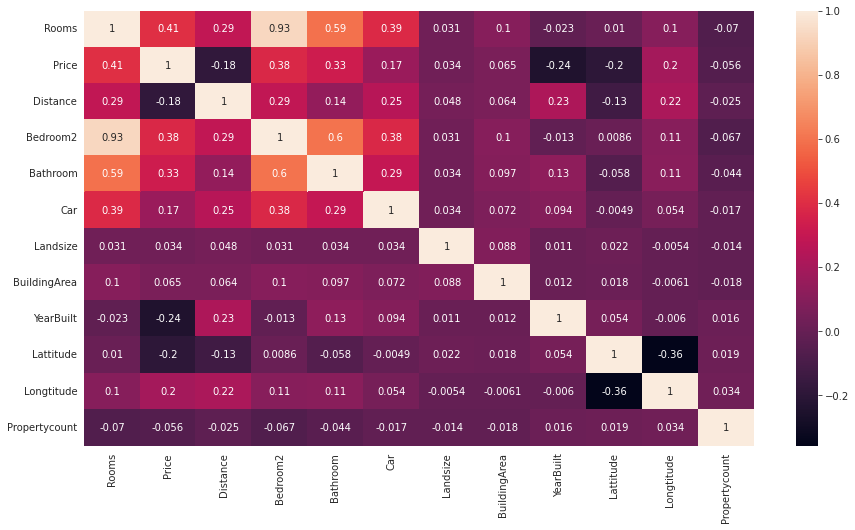

In [ ]:
sns.set({'figure.figsize':(15,8)})
sns.heatmap(new_data.corr(), annot=True)



In [ ]:
# Extracting the independent and dependent variables
x = new_data.loc[:, new_data.columns!="Price"]
y = new_data.iloc[:,1]

In [ ]:
# Dividing the dataset into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state=0)

In [ ]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (17883, 11)
X_test: (4471, 11)
Y_train: (17883,)
Y_test: (4471,)


In [ ]:
# Fitting the regression model
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Obtaining the Slope and Intercept
print("Intercept", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept -115891287.70203286
Coefficient:  [ 1.73685909e+05 -2.40888011e+04  8.82185258e+03  7.27027796e+04
  3.42071333e+04  4.73990976e+00  4.42828362e+01 -2.57985425e+03
 -9.00516445e+05  6.03439251e+05 -3.21699997e+00]


In [ ]:
# Predicting the response
y_pred = model.predict(x_test)
y_pred

array([ 771676.26603459,  728717.56948133,  910098.93981504, ...,
       1087971.7880006 ,  908203.22865455, 1240466.64639044])

In [ ]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,"%")

39.229847310680555 %


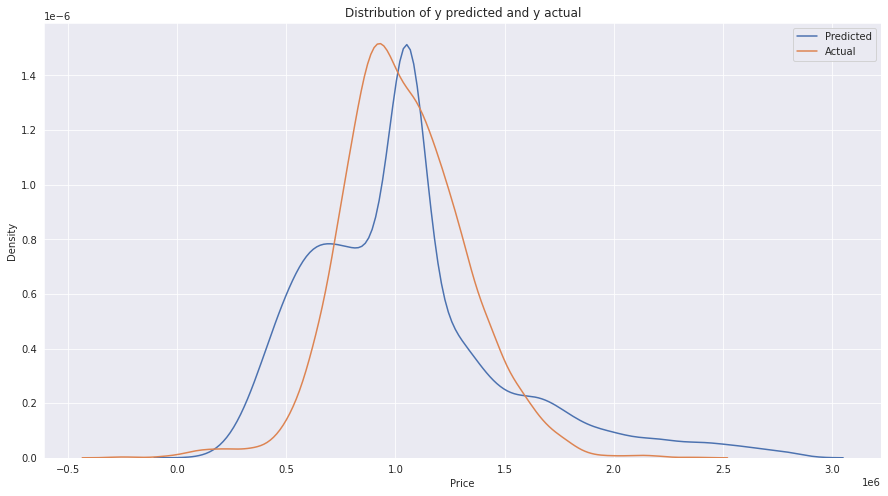

In [ ]:
plt.title("Distribution of y predicted and y actual")
ax1=sns.distplot(y_test, hist=False)
sns.distplot(y_pred, hist=False, ax=ax1)
plt.legend(["Predicted", "Actual"])
plt.show()

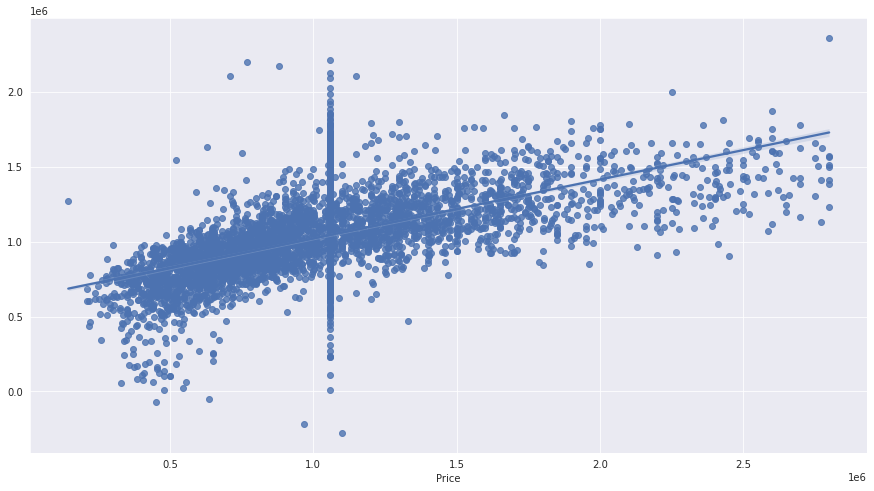

In [ ]:
sns.regplot(y_test, y_pred)

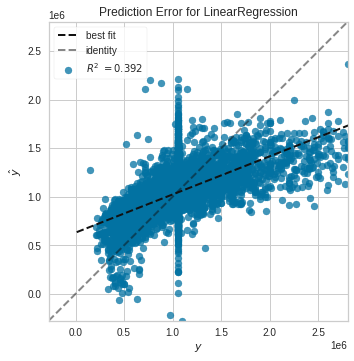

In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer  = PredictionError(model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()

**Analysing the accuracy by removing the outliers with the help of Quartiles**

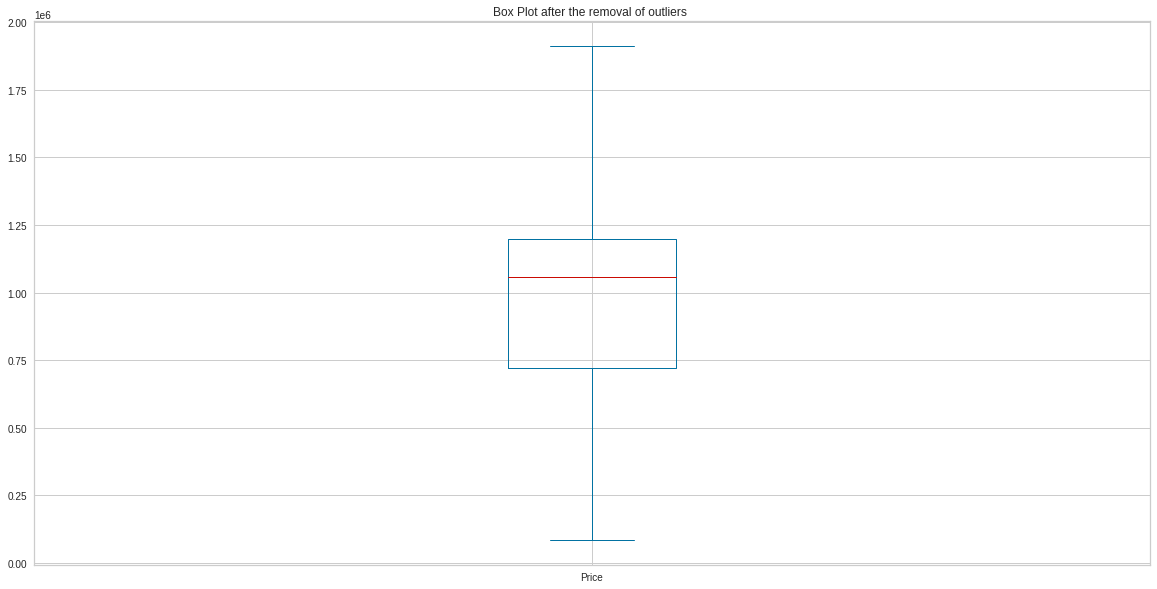

Intercept:  -116420761.3394259


Coefficient:  [ 1.57246583e+05 -2.31230321e+04  1.14544841e+04  6.72761207e+04
  3.57778016e+04  8.36220041e+00  3.82796439e+01 -2.40232786e+03
 -8.89413552e+05  6.07716858e+05 -2.59516812e+00]

Accuracy:  40.86603904218602 %


In [ ]:
#loading the dataset
df =pd.read_csv("Melbourne_housing_FULL.csv")
df.head(5)

# Dropping the categorical columns
df.drop(["Suburb","Address","Type","Method","SellerG","Date","Postcode","CouncilArea","Regionname"], axis =1,inplace=True)

# Replacing the null values with mean
df["Price"] =  df["Price"].fillna(df["Price"].mean())
df["Landsize"] =  df["Landsize"].fillna(df["Landsize"].mean())
df["BuildingArea"] =  df["BuildingArea"].fillna(df["BuildingArea"].mean())

# Replacing the null values with mode
df["Bedroom2"].fillna(df["Bedroom2"].mode()[0], inplace =True)
df["Bathroom"].fillna(df["Bathroom"].mode()[0], inplace =True)
df["Car"].fillna(df["Car"].mode()[0], inplace =True)
df["YearBuilt"].fillna(df["YearBuilt"].mode()[0], inplace=True)

# Dropping rows which have very few missing values
df.dropna(subset = ["Distance"], inplace=True, axis=0)
df.dropna(subset =["Propertycount"], inplace=True, axis = 0)
df.dropna(subset=["Lattitude"], inplace=True, axis=0)
df.dropna(subset=["Longtitude"], inplace=True, axis=0)

# Removal of Outliers using the Interquartile method
P25 = df["Price"].quantile(0.25)
P75 = df["Price"].quantile(0.75)
IQR = P75-P25



upper_limit = P75 + 1.5*IQR
lower_limit = P25-1.5*IQR



new_df = data.copy()
new_df["Price"]=np.where(new_df["Price"]>upper_limit,upper_limit,
                                np.where(new_df["Price"]<lower_limit,lower_limit,
                                         new_df["Price"]))

# Box plot after the removal of outliers
new_df["Price"].plot(kind='box', title='Box Plot after the removal of outliers ',figsize=(20,10))
plt.show()

# Extracting the independent and dependent variables
x = new_df.loc[:, new_df.columns!="Price"]
y = new_df.iloc[:,1]
new_df = new_df.astype(int)

# Dividing the dataset into training and test data
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test =train_test_split(x,y,test_size =0.2, random_state=0)

# Fitting the regression model
from sklearn.linear_model import LinearRegression
model1 =LinearRegression()
model1.fit(x1_train,y1_train)


# Obtaining the Slope and Intercept
print("Intercept: ", model1.intercept_)
print("\n\nCoefficient: ", model1.coef_)

# Predicting the response
y_pred1 = model1.predict(x1_test)
y_pred1

r2_score1 = model1.score(x1_test,y1_test)
print("\nAccuracy: ", r2_score1*100,"%")



*   Outliers are the values which are far away from the average set of values. Having outliers in the dataset can lead to more training times and less accuracy. Also Machine Learning Algorithms are sensitive to the range and distribution of the attribute values. Thus, it is necessary to detect and remove the outliers in the data.

*   In the first model, when we used the Z-Score to remove the outliers, the obtained accuracy for the fitted model obtained was 3%. Later, when we trained the  same model by removing the outliers with the help of quartiles method the obtained accuracy was 40.85%. Therefore, we can conclude that accuracy of the model also depends on the technique we have used to remove the outliers.


*   When we trained the model without removing the outliers, the accuracy was 37.26%. There is 0.3% decrease in the accuracy when compared to the model without outliers.

*   Thus, for the dataset, depending on the preprocessing techniques and the features selected we can conclude that for this particular model the outliers aren't influencing much




Checking for Overfitting

In [ ]:
from sklearn.metrics import mean_squared_error
train_pred = model1.predict(x1_train)
print("The RMSE value for Train Set is: ", round(np.sqrt(mean_squared_error(y1_train, train_pred)),2))
print("The RMSE value for Test Set is: ", round(np.sqrt(mean_squared_error(y1_test, y_pred1)),2))





The RMSE value for Train Set is:  311078.8
The RMSE value for Test Set is:  315876.76


There is no significant difference between the Train Error and test Error and Thus, we can say that our model is balanced model.

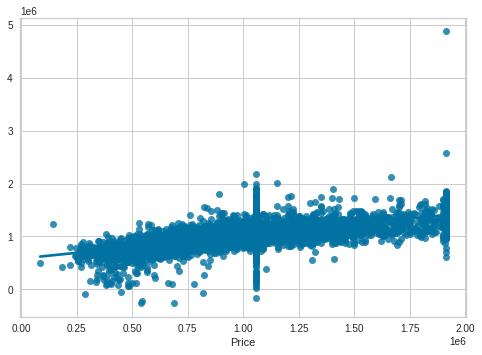

In [ ]:
sns.regplot(y1_test, y_pred1)

# Regularization

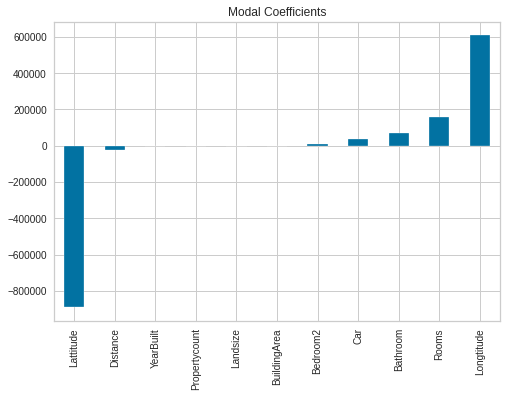

In [ ]:
from pandas import Series
predictors = x1_train.columns
coef = Series(model1.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In the above plots we can see that magnitude of coefficents of Lattitude, Longitude and Rooms is higher and therefore our model would have been more drived by these features. With the help of regularization we can keep the same number of features but reduce the magnitude of coefficients and prevent over fitting.

# Ridge

In [ ]:
from sklearn.linear_model import Ridge
Ridge_Model = Ridge(alpha = 5)
Ridge_Model.fit(x1_train,y1_train)

Ridge(alpha=5)

In [ ]:
y_predR = Ridge_Model.predict(x1_test)
y_predR

array([ 700964.05340371,  718132.71873842,  860645.7676397 , ...,
       1242375.45535193,  697947.07531208, 1309437.20612085])

In [ ]:
r2_scoreR = Ridge_Model.score(x1_test,y1_test)
print(r2_scoreR*100,"%")

40.91403063728853 %


In [ ]:
n=26881
k=11
adj_r2_score = 1 - ((1-r2_scoreR)*(n-1)/(n-k-1))
print(adj_r2_score)

0.4088984121218936


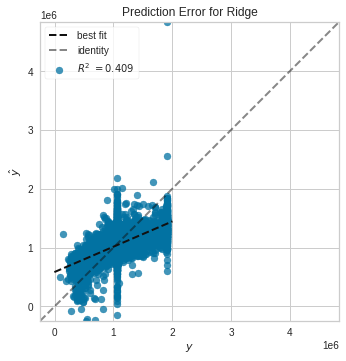

In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer  = PredictionError(Ridge_Model)
visualizer.fit(x1_train,y1_train)
visualizer.score(x1_test,y1_test)
visualizer.poof()

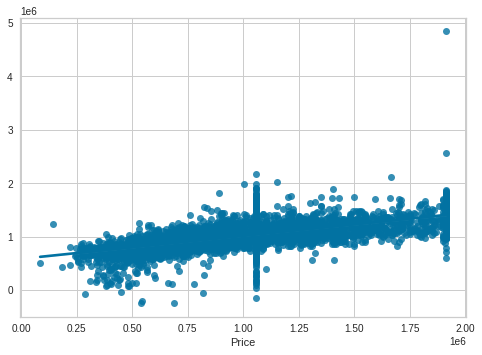

In [ ]:
sns.regplot(y1_test,y_predR)

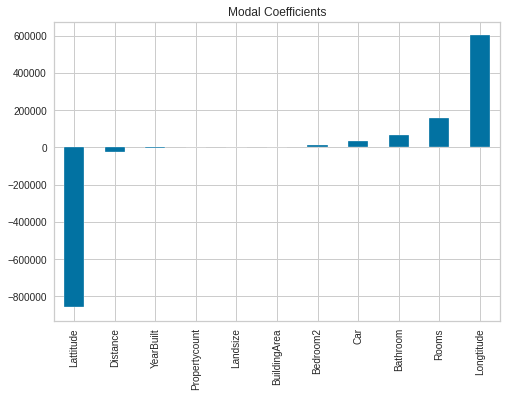

In [ ]:
predictorsR = x1_train.columns
coef = Series(Ridge_Model.coef_,predictorsR).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

# Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 4)
lasso_model.fit(x1_train,y1_train)

Lasso(alpha=4)

In [ ]:
y_pred_lasso = lasso_model.predict(x1_test)
y_pred_lasso

array([ 699559.87329891,  718455.28276399,  861187.15825115, ...,
       1245684.96164899,  696844.75305441, 1312954.47783636])

In [ ]:
r2_scoreL = lasso_model.score(x1_test,y1_test)
print(r2_scoreL*100,"%")

40.86703476034293 %


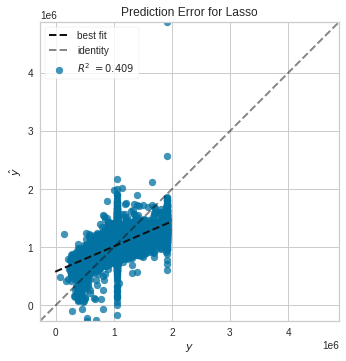

In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer  = PredictionError(lasso_model)
visualizer.fit(x1_train,y1_train)
visualizer.score(x1_test,y1_test)
visualizer.poof()

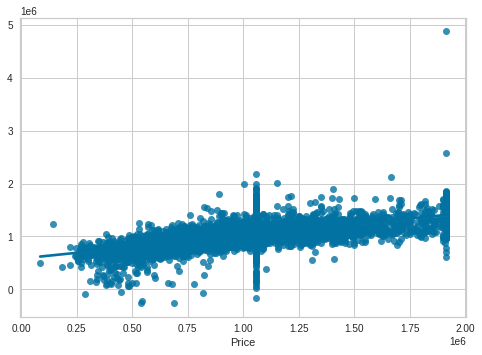

In [ ]:
sns.regplot(y1_test,y_pred_lasso)

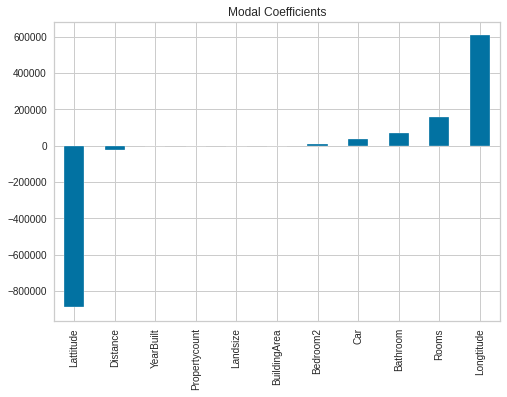

In [ ]:
predictors = x1_train.columns
coef = Series(lasso_model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

* As we increase the values of Alpha, the magnitude of coefficients decreases, where the value would reach to 0 but not absolute Zero in the case of Ridge Regression. In Lasso the value would reach absolute zero.
* In both Lasso and Ridge, the obtained accuracy is 40.8%.